In [1]:
from datascience import *
%matplotlib inline
from path_data_variable import *
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [2]:
sf2019 = Table.read_table(path_data + 'san_francisco_2019.csv')

In [3]:
sf2019.show(3)

In [4]:
sf2019.where('Job', 'Mayor')

Organization Group               | Department | Job Family                    | Job   | Salary | Overtime | Benefits | Total Compensation
General Administration & Finance | Mayor      | Administrative & Mgmt (Unrep) | Mayor | 342974 | 0        | 98012    | 440987

In [5]:
sf2019.sort('Total Compensation')

Organization Group                      | Department         | Job Family                    | Job                            | Salary | Overtime | Benefits | Total Compensation
Public Protection                       | Adult Probation    | Probation & Parole            | Deputy Probation Officer       | 0      | 0        | 0        | 0
Public Protection                       | Fire Department    | Clerical, Secretarial & Steno | Senior Clerk Typist            | 0      | 0        | 0        | 0
Public Protection                       | Juvenile Court     | Correction & Detention        | Counselor, Juvenile Hall PERS  | 0      | 0        | 0        | 0
Public Protection                       | Police             | Clerical, Secretarial & Steno | Clerk Typist                   | 0      | 0        | 0        | 0
Public Protection                       | Sheriff            | Correction & Detention        | Deputy Sheriff                 | 0      | 0        | 0        | 0
Public Works, Transportation & Commerce | Airport Commission | Sub-Professional Engineering  | StdntDsgn Train2/Arch/Eng/Plng | 0      | 0        | 0        | 0
Public Works, Transportation & Commerce | Airport Commission | Clerical, Secretarial & Steno | Executive Secretary 1          | 0      | 0        | 0        | 0
Public Works, Transportation & Commerce | Airport Commission | Payroll, Billing & Accounting | Senior Account Clerk           | 0      | 0        | 0        | 0
Public Works, Transportation & Commerce | Airport Commission | Housekeeping & Laundry        | Custodian                      | 0      | 0        | 0        | 0
Public Works, Transportation & Commerce | Airport Commission | Housekeeping & Laundry        | Custodian                      | 0      | 0        | 0        | 0
... (44515 rows omitted)

In [6]:
sf2019 = sf2019.where('Salary', are.above(15000))

In [7]:
sf2019.num_rows

37103

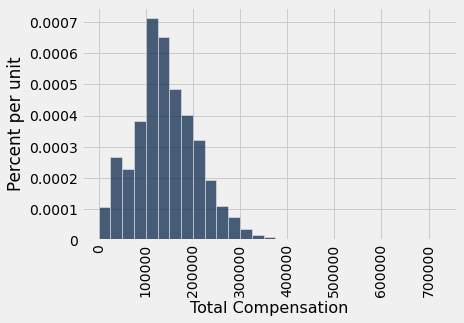

In [8]:
sf_bins = np.arange(0, 726000, 25000)
sf2019.select('Total Compensation').hist(bins=sf_bins)

In [9]:
sf2019.sort('Total Compensation', descending=True).show(2)

In [10]:
pop_median = percentile(50, sf2019.column('Total Compensation'))
pop_median

135747.0

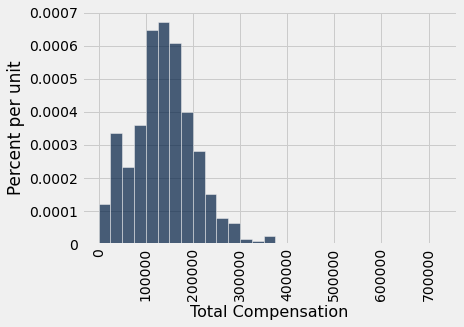

In [13]:
our_sample = sf2019.sample(500, with_replacement=False)
our_sample.select('Total Compensation').hist(bins=sf_bins)

In [14]:
est_median = percentile(50, our_sample.column('Total Compensation'))
est_median

136835.0

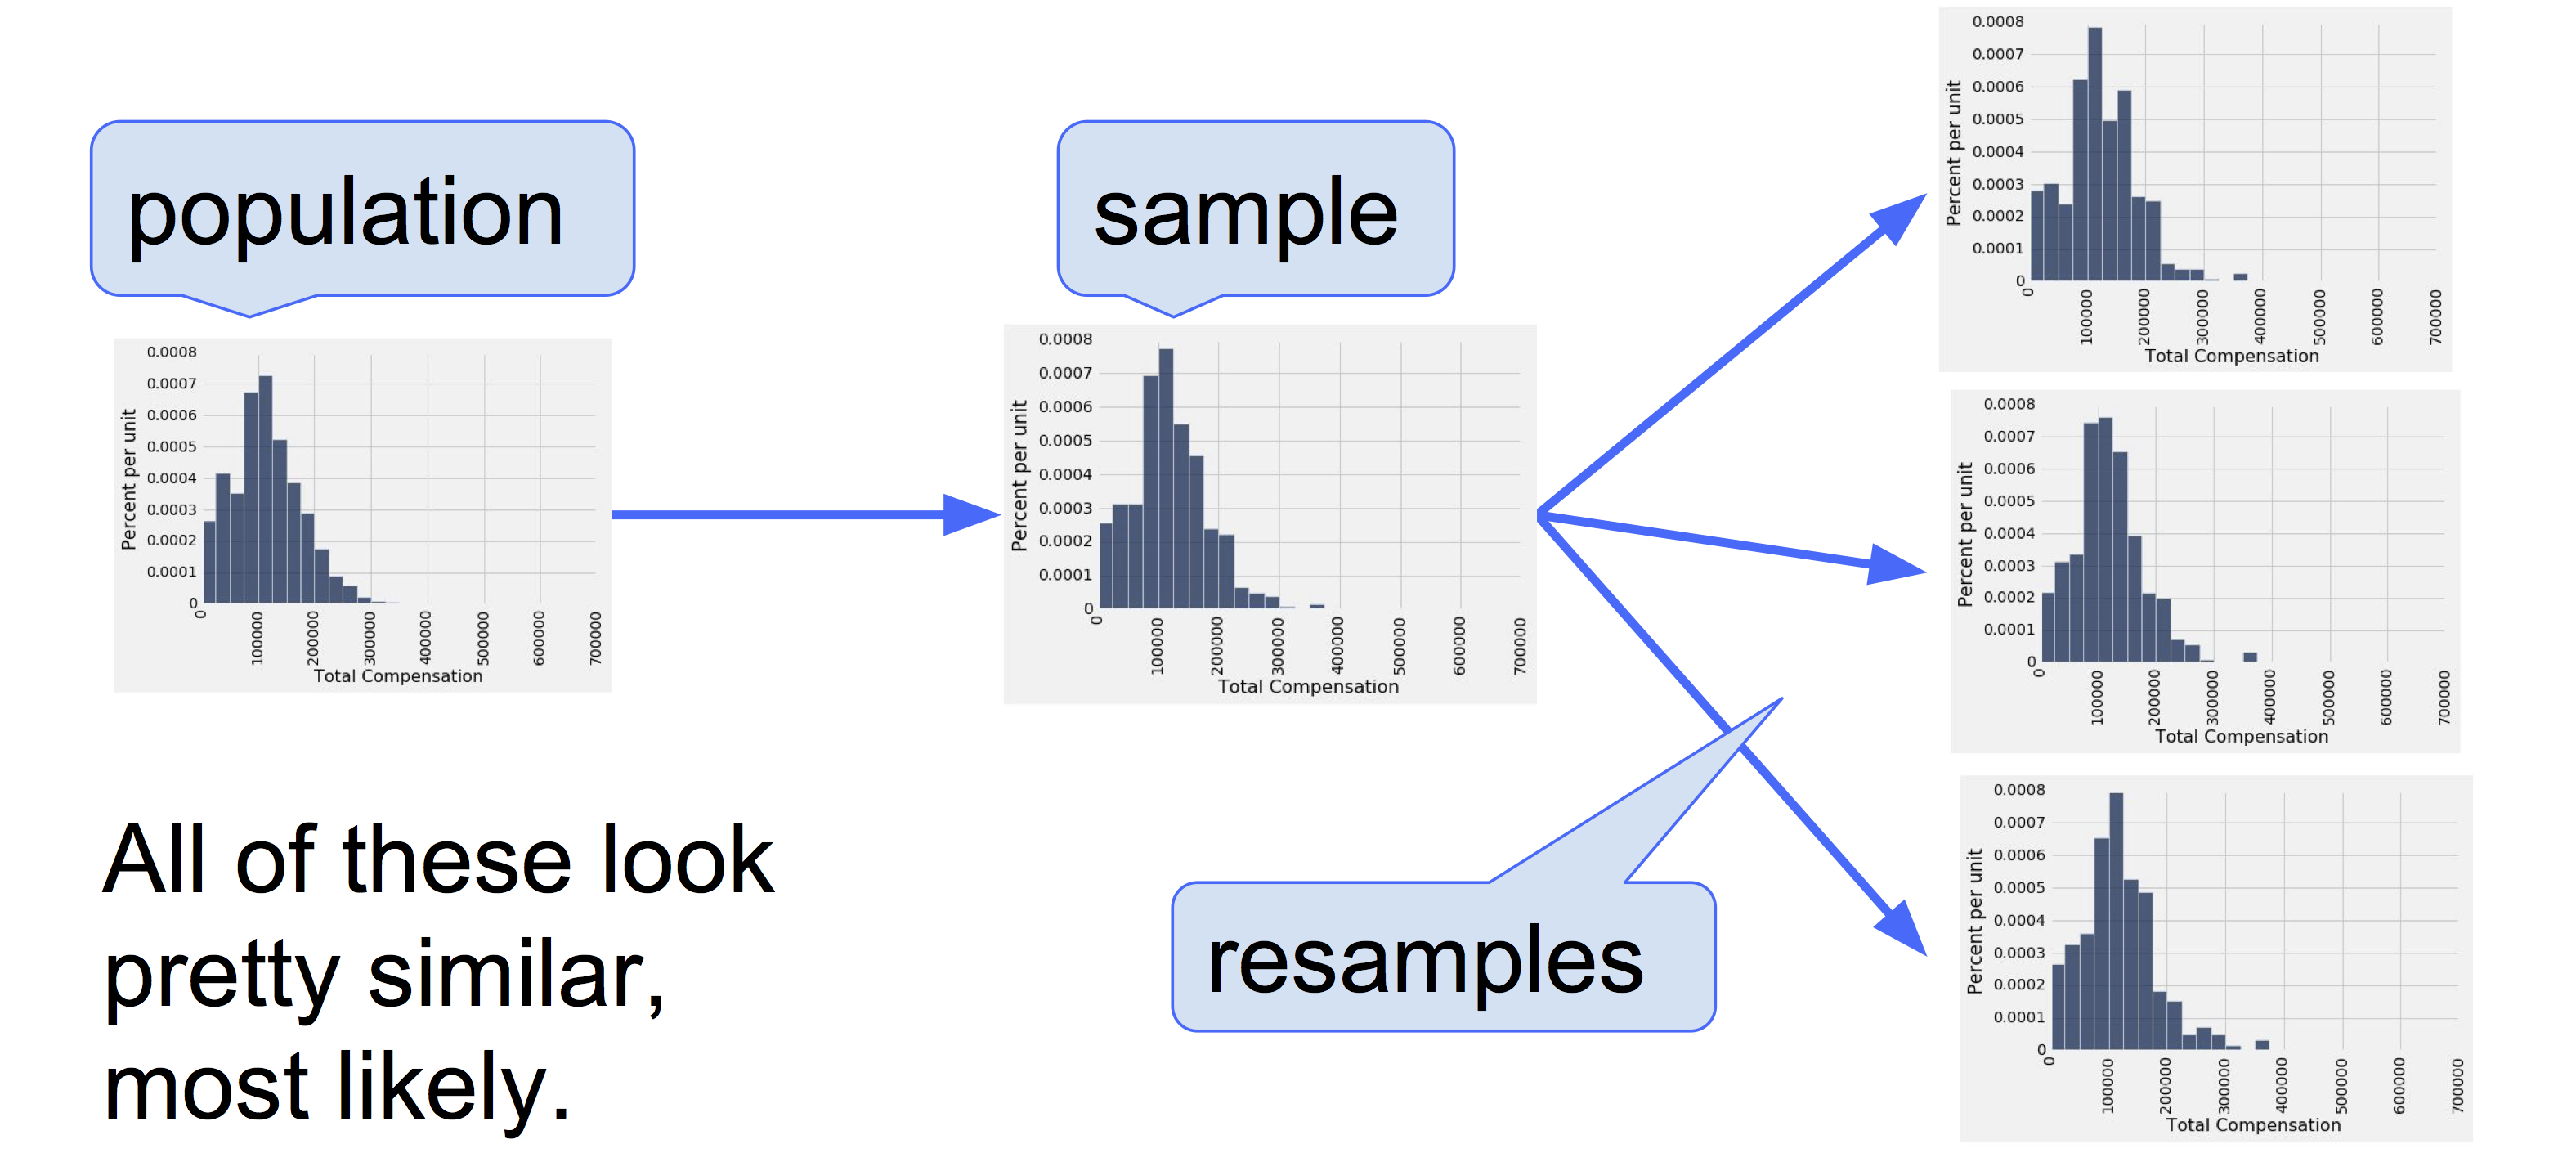

In [4]:
from IPython.display import Image
Image("../../../images/bootstrap_pic.png")

In [15]:
resample_1 = our_sample.sample()

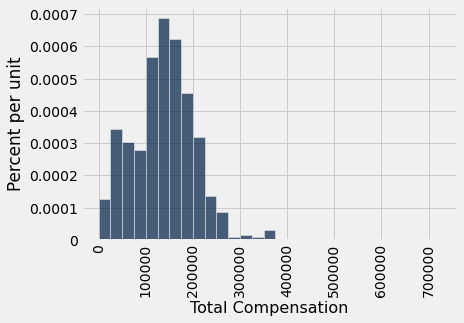

In [16]:
resample_1.select('Total Compensation').hist(bins=sf_bins)

In [17]:
resampled_median_1 = percentile(50, resample_1.column('Total Compensation'))
resampled_median_1

141793.0

In [18]:
resample_2 = our_sample.sample()
resampled_median_2 = percentile(50, resample_2.column('Total Compensation'))
resampled_median_2

135880.0

In [19]:
def one_bootstrap_median():
    resampled_table = our_sample.sample()
    bootstrapped_median = percentile(50, resampled_table.column('Total Compensation'))
    return bootstrapped_median

In [20]:
one_bootstrap_median()

132175.0

In [21]:
num_repetitions = 5000
bstrap_medians = make_array()
for i in np.arange(num_repetitions):
    bstrap_medians = np.append (bstrap_medians, one_bootstrap_median())

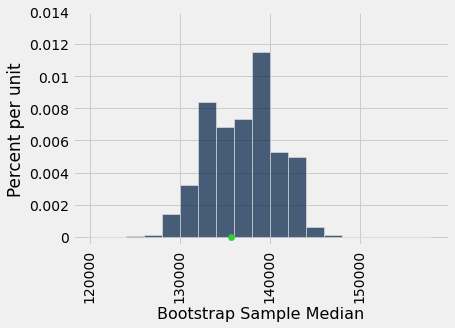

In [22]:
resampled_medians = Table().with_column('Bootstrap Sample Median', bstrap_medians)
median_bins=np.arange(120000, 160000, 2000)
resampled_medians.hist(bins = median_bins)

# Plotting parameters; you can ignore this code
parameter_green = '#32CD32'
plots.ylim(-0.000005, 0.00014)
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2);

In [23]:
left = percentile(2.5, bstrap_medians)
left

129524.0

In [24]:
right = percentile(97.5, bstrap_medians)
right

143446.0

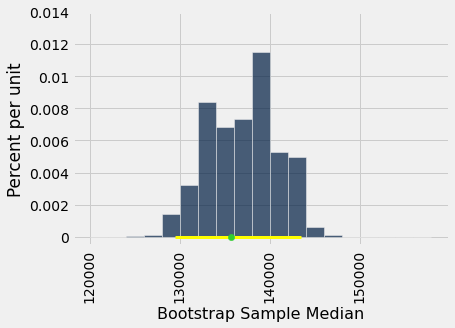

In [25]:
resampled_medians.hist(bins = median_bins)

# Plotting parameters; you can ignore this code
plots.ylim(-0.000005, 0.00014)
plots.plot([left, right], [0, 0], color='yellow', lw=3, zorder=1)
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2);

In [117]:
def bootstrap_median(original_sample, num_repetitions):
    medians = make_array()
    for i in np.arange(num_repetitions):
        new_bstrap_sample = original_sample.sample()
        new_bstrap_median = percentile(50, new_bstrap_sample.column('Total Compensation'))
        medians = np.append(medians, new_bstrap_median)
    return medians

In [118]:
# THE BIG SIMULATION: This one takes several minutes.

# Generate 100 intervals and put the endpoints in the table intervals

left_ends = make_array()
right_ends = make_array()

for i in np.arange(100):
    original_sample = sf2019.sample(500, with_replacement=False)
    medians = bootstrap_median(original_sample, 5000)
    left_ends = np.append(left_ends, percentile(2.5, medians))
    right_ends = np.append(right_ends, percentile(97.5, medians))

intervals = Table().with_columns(
    'Left', left_ends,
    'Right', right_ends
)    

In [119]:
intervals

Left   | Right
125093 | 139379
129925 | 140757
133955 | 146369
129335 | 140847
132756 | 145429
130167 | 143200
125935 | 138491
131092 | 142472
128509 | 140462
131270 | 145998
... (90 rows omitted)

In [120]:
pop_median

135747.0

In [121]:
intervals.where(
    'Left', are.below(pop_median)).where(
    'Right', are.above(pop_median)).num_rows

93

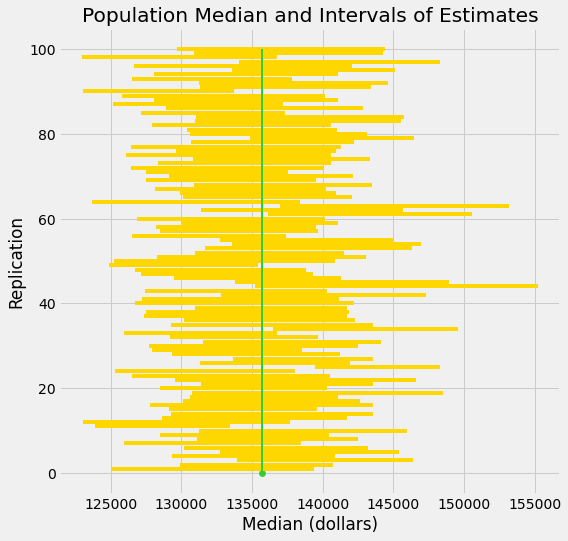

In [122]:
replication_number = np.ndarray.astype(np.arange(1, 101), str)
intervals2 = Table(replication_number).with_rows(make_array(left_ends, right_ends))

plots.figure(figsize=(8,8))
for i in np.arange(100):
    ends = intervals2.column(i)
    plots.plot(ends, make_array(i+1, i+1), color='gold')
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2)
plots.plot(make_array(pop_median, pop_median), make_array(0, 100), color=parameter_green, lw=2)
plots.xlabel('Median (dollars)')
plots.ylabel('Replication')
plots.title('Population Median and Intervals of Estimates');